<a href="https://colab.research.google.com/github/manish55shukla/AirBnb-Bookings-Analysis/blob/main/Project_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - AirBnb Bookings Analysis


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Manish Shukla


# **Project Summary**

## ****Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.****

##****This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.****


####"And I think to myself, what a wonderful Airbnb." —Based on "What a Wonderful World" by Louis Armstrong


## ***About Airbnb***

Airbnb, Inc is an American San Francisco based company operating an online marketplace for short-term homestays and experiences. The company acts as a broker and charges a commission from each booking.

The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. 

Airbnb is a shortened version of its original name, AirBedandBreakfast.com.  The company is credited with revolutionizing the tourism industry however, it has also been the subject of intense criticism by residents of tourism hotspot cities like Barcelona, Venice, etc. for enabling an unaffordable increase in home rents, and for a lack of regulation. 

# **GitHub Link**

https://github.com/manish55shukla/AirBnb-Bookings-Analysis

# **Problem Statement**


### How relevant are this concept and the details associated with it to the data we have will be the key question I want to address with this data exploration. The ultimate goal of this project is to find out the number of persons in particular room type and their neighbour along with this their reviews and location of the hotel.

### Define Your Business Objective?

### Our business objective here is to analyse and create meaningful insights from the booking data of Airbnb. The insights will help us to know about guest's behaviour towards hotels and their locations in New York. We need to deep dive into the facts to gather business information which can help us to choose our future course of action by considering the market preferences.

# **General Guidelines :-**

1. Well-structured, formatted, and commented code is required.

2. Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

            [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
3. Each and every logic should have proper comments.

4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

```
# Chart visualization code
```

Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 20 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

# ***Let's Begin !***

### Import Libraries

In [1]:
#Importing all the libraries 

import numpy as np
import pandas as pd
import missingno as msnum 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline 

#It enables inline plotting i.e, the plot/graph will be displayed below the cell where the plotting commands are written. 

### Dataset Loading


In [3]:
# Mount the google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Reading file

df_airbnb_bookings = pd.read_csv('Airbnb NYC 2019.csv')
df_airbnb_bookings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows = len(df_airbnb_bookings.index)
print(rows)
columns = len(df_airbnb_bookings.columns)
print(columns)

22059
16


In [6]:
#Direct approach to show the no. of rows & columns in a tuple
df_airbnb_bookings.shape

(22059, 16)

In [7]:
# Print information about the DataFrame
df_airbnb_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22059 entries, 0 to 22058
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22059 non-null  int64  
 1   name                            22044 non-null  object 
 2   host_id                         22059 non-null  int64  
 3   host_name                       22045 non-null  object 
 4   neighbourhood_group             22059 non-null  object 
 5   neighbourhood                   22059 non-null  object 
 6   latitude                        22059 non-null  float64
 7   longitude                       22059 non-null  float64
 8   room_type                       22058 non-null  object 
 9   price                           22058 non-null  float64
 10  minimum_nights                  22058 non-null  float64
 11  number_of_reviews               22058 non-null  float64
 12  last_review                     

#### All the duplicate values 

In [8]:
# Dataset Duplicate Value Count
## Here we have count the duplicate values from a column
dupplicate_value_count = df_airbnb_bookings.pivot_table(columns=['neighbourhood_group'], aggfunc='size')
print(dupplicate_value_count)

neighbourhood_group
Bronx              319
Brooklyn          9497
Manhattan        10204
Queens            1918
Staten Island      121
dtype: int64


In [9]:
# As we cann see in original table there are multiple duplicate values in 'room_type' column also. 
dupplicate_value_count = df_airbnb_bookings.pivot_table(columns=['neighbourhood_group', 'room_type'], aggfunc='size')

print(dupplicate_value_count)

neighbourhood_group  room_type      
Bronx                Entire home/apt     119
                     Private room        192
                     Shared room           8
Brooklyn             Entire home/apt    4850
                     Private room       4523
                     Shared room         124
Manhattan            Entire home/apt    6303
                     Private room       3728
                     Shared room         172
Queens               Entire home/apt     771
                     Private room       1105
                     Shared room          42
Staten Island        Entire home/apt      59
                     Private room         62
dtype: int64


###There are some missing along with null values in the table

In [10]:
# Calculate which fields are null in the DataFrame
df_airbnb_bookings.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       3701
reviews_per_month                 3701
calculated_host_listings_count       1
availability_365                     1
dtype: int64

<Figure size 1000x600 with 0 Axes>

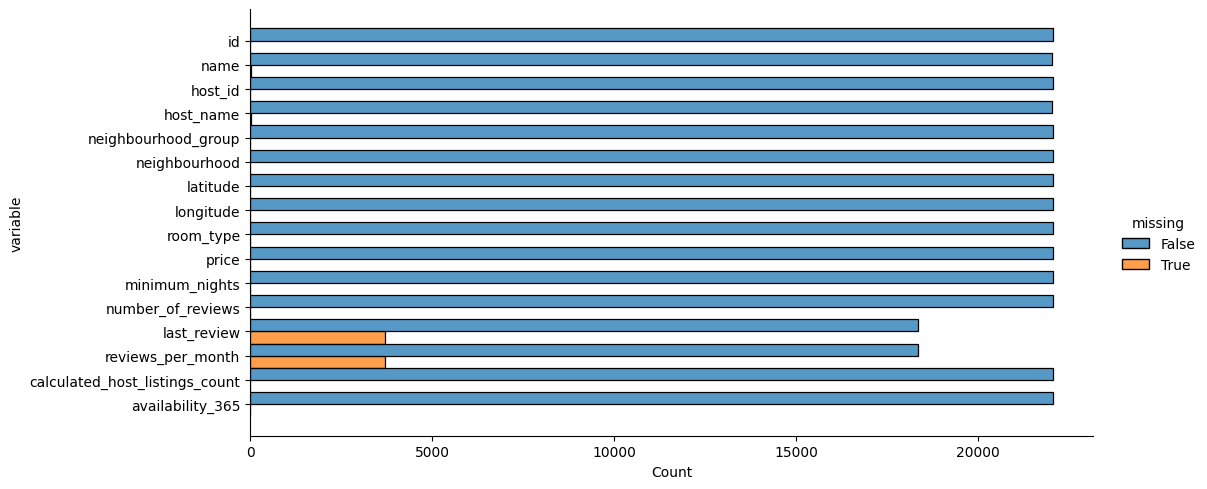

In [11]:
# Visualizing the missing values
#plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

plt.figure(figsize = (10,6))
sns.displot( 
     data=df_airbnb_bookings.isna().melt(value_name="missing"),
            y = "variable",
            hue = "missing",
            multiple = "dodge",
            aspect = 2.25
)

#The visualization of the missing values clearly shows that there are four columns which contains the missing values. 
#These are "name", "host_name", "last_review", "reviews per month" that contains the null values while the rest of the 
#columns does not contain any null value.

### What did you know about your dataset?

### **As of now, we are working with a dataset of AirBnb Bookings. We are here to analyse the provided data, and through analysis, we will produce some insights about different room types and what is the average review rating of the hotel along with the price so that the user can clearly understand how and where they've to stay and which rooms they've to book for best service and particular location**

## ***2. Understanding Your Variables***

In [12]:
# All the columns of the DataSet
ds_column = df_airbnb_bookings.columns
print(ds_column)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [13]:
# Descibe the Dataset
df_airbnb_bookings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.205900e+04,2.205900e+04,22059.000000,22059.000000,22058.000000,22058.000000,22058.000000,18358.000000,22058.000000,22058.000000
mean,8.511062e+06,2.447159e+07,40.729520,-73.956852,151.245852,7.408151,35.785248,0.944976,3.721688,103.508614
std,5.258526e+06,2.707545e+07,0.053118,0.039701,235.534537,23.883845,58.826793,1.297014,12.938362,132.634612
min,2.539000e+03,2.571000e+03,40.499790,-74.242850,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,3.996390e+06,3.977023e+06,40.689765,-73.983265,73.000000,2.000000,1.000000,0.100000,1.000000,0.000000
50%,8.520836e+06,1.428111e+07,40.723370,-73.958010,110.000000,3.000000,9.000000,0.360000,1.000000,9.000000
75%,1.324998e+07,3.657868e+07,40.763950,-73.941490,175.000000,5.000000,45.000000,1.310000,2.000000,221.000000
max,1.775024e+07,1.210969e+08,40.908040,-73.000000,10000.000000,1250.000000,629.000000,16.220000,121.000000,365.000000


### Variables Description 


'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'



1.   **ID** - Shows the unique ID of the listing
2.  **Name** -   It shows the name of the listings 
3.   **host_id** - The ID of the hosts
4.   **host_name** - Name of the hosts available
5.   **neighbourhood_group** - Location of the neighbourhood
6.   **neighbourhood** - It shows the area of the neighbourhood 
7.   **latitude** - The range of latitude
8.   **longitude** - The range of longitude
9.   **room_type** - It shows different type of listings available 
10.   **price** - It shows the price of listing price available
11.   **minimum_nights** - It shows the price of minimum night to be paid for listing available
12.   **number_of_reviews** - Number of reviews 
13.   **last_review** - It represents the content of the last review 
14.   **reviews_per_month** - It shows checks on a basis of monthly duration
15.   **calculated_host_listings_count** - It shows the total number of listing count 
16.   **availability_365** - It shows the availablitiy for period of time i.e, 1 year








### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
ds_column.unique()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
# Check Unique Values for each variable.
df_airbnb_bookings.nunique()

id                                22059
name                              21769
host_id                           18461
host_name                          6475
neighbourhood_group                   5
neighbourhood                       205
latitude                          12936
longitude                          9806
room_type                             3
price                               479
minimum_nights                       87
number_of_reviews                   390
last_review                        1745
reviews_per_month                   673
calculated_host_listings_count       35
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
# Maximum booking for particular hotel name

df_airbnb_bookings['name'].value_counts().index[0]

'Loft Suite @ The Box House Hotel'

In [17]:
#Showing the neighbourhood_group in from Highest to lowest no. of number_of_reviews
df_airbnb_bookings['neighbourhood_group'].value_counts()

Manhattan        10204
Brooklyn          9497
Queens            1918
Bronx              319
Staten Island      121
Name: neighbourhood_group, dtype: int64

In [18]:
#Finding out the maximum price of the neighbourhood group followed by the neighbourhood name
max_price = df_airbnb_bookings['price'].max()
print(max_price)

neighbour_group_max_price = df_airbnb_bookings.loc[df_airbnb_bookings['price'].idxmax()].neighbourhood_group
print(neighbour_group_max_price)

neighbour_name_max_price = df_airbnb_bookings.loc[df_airbnb_bookings['price'].idxmax()].neighbourhood
print(neighbour_name_max_price)

10000.0
Queens
Astoria


In [19]:
# Print the first 10 name, price and corresponding room type of DataFrame

df_airbnb_bookings.loc[0:9, ["name","price",'room_type']]

,name,price,room_type
0,Clean & quiet apt home by the park,149.0,Private room
1,Skylit Midtown Castle,225.0,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,150.0,Private room
3,Cozy Entire Floor of Brownstone,89.0,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,80.0,Entire home/apt
5,Large Cozy 1 BR Apartment In Midtown East,200.0,Entire home/apt
6,BlissArtsSpace!,60.0,Private room
7,Large Furnished Room Near B'way,79.0,Private room
8,Cozy Clean Guest Room - Family Apt,79.0,Private room
9,Cute & Cozy Lower East Side 1 bdrm,150.0,Entire home/apt


In [20]:
# Print first 10 persons of private room having host_id, host_name, neighbourhood having maximum number_of_reviews.

private_rooms = df_airbnb_bookings[df_airbnb_bookings['room_type'] == 'Private room']
list_private_rooms = private_rooms.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name = "number_of_reviews").sort_values(by= ['number_of_reviews'],ascending =False)

list_private_rooms.head(10)

,host_id,host_name,neighbourhood,number_of_reviews
2421,6885157,Randy,Bedford-Stuyvesant,13
7772,96098402,Wynpoints,Midtown,12
7181,65809485,Shirley,Flushing,12
7288,69545883,Chayla,Midtown,12
311,344035,Brooklyn& Breakfast -Len-,Prospect Heights,12
3931,16677326,Alex And Zeena,Chelsea,11
345,417504,The Box House Hotel,Greenpoint,11
5058,26377263,Stat,Bushwick,10
5700,35524316,Yasu & Akiko,Hell's Kitchen,10
4056,17638424,Sophie,Elmhurst,8


In [21]:
# FInd out how many unique neighbourhood Erin have

erin_data = df_airbnb_bookings[df_airbnb_bookings['host_name'] == 'Erin']

erin_neighbourhood = erin_data[['host_id','host_name','neighbourhood']]

erin_neighbourhood.head(10)

,host_id,host_name,neighbourhood
888,1644452,Erin,Gramercy
1004,1952186,Erin,Williamsburg
1185,2487319,Erin,Upper West Side
1303,2790324,Erin,Bedford-Stuyvesant
2334,712590,Erin,Prospect Heights
2389,4922378,Erin,Midtown
2577,1673136,Erin,Chelsea
2831,8457613,Erin,Gramercy
3405,10478532,Erin,Hell's Kitchen
4285,3864482,Erin,Greenwich Village


In [22]:
#Find number of room types and mean of the price along with minimum nights
count_room_type = df_airbnb_bookings.groupby('room_type').agg({'room_type':'count','price':'mean','minimum_nights':'min'})

print(count_room_type)

                 room_type       price  minimum_nights
room_type                                             
Entire home/apt      12102  201.782928             1.0
Private room          9610   90.053694             1.0
Shared room            346   83.202312             1.0


In [23]:
# Total number of groups are there in particular neighbourhood groups. 
neighbourhood_group_name = df_airbnb_bookings.groupby('neighbourhood_group')['name'].count()

print(neighbourhood_group_name)

neighbourhood_group
Bronx              318
Brooklyn          9492
Manhattan        10195
Queens            1918
Staten Island      121
Name: name, dtype: int64


In [24]:
# Name of Maximum number of groups are there in neighbourhood groups. 
neighbourhood_group_name = df_airbnb_bookings.groupby('neighbourhood_group')['name'].count().max()

print(df_airbnb_bookings['neighbourhood_group'].value_counts().index[0])

print(neighbourhood_group_name)

Manhattan
10195


In [25]:
# Minimum number of groups are there in particular neighbourhood groups. 
neighbourhood_group_name = df_airbnb_bookings.groupby('neighbourhood_group')['name'].count().min()

print(df_airbnb_bookings['neighbourhood_group'].value_counts().index[-1])

print(neighbourhood_group_name)

Staten Island
121


In [26]:
# Room wise distribution in each neighbourhood group 
room_wise_dist = df_airbnb_bookings.groupby(['neighbourhood_group','room_type']).agg({'room_type':'count','availability_365':'mean'})
room_wise_dist


room_type  availability_365
neighbourhood_group room_type                                   
Bronx               Entire home/apt        119        165.420168
                    Private room           192        181.468750
                    Shared room              8        244.250000
Brooklyn            Entire home/apt       4850         99.782474
                    Private room          4523         92.063232
                    Shared room            124        149.008065
Manhattan           Entire home/apt       6303        100.938601
                    Private room          3728         93.632779
                    Shared room            172        111.430233
Queens              Entire home/apt        771        130.076524
                    Private room          1105        152.776471
                    Shared room             42        165.833333
Staten Island       Entire home/apt         59        193.237288
                    Private room            62        257.580645

In [27]:
# Name of host_name who have spend the maximum number of night in hotel. 
neighbourhood_night_group = df_airbnb_bookings.groupby('minimum_nights').count().max()

# print(df_airbnb_bookings['minimum_nights'].value_counts().index[0])

print(neighbourhood_night_group)

id                                5507
name                              5499
host_id                           5507
host_name                         5500
neighbourhood_group               5507
neighbourhood                     5507
latitude                          5507
longitude                         5507
room_type                         5507
price                             5507
number_of_reviews                 5507
last_review                       4390
reviews_per_month                 4390
calculated_host_listings_count    5507
availability_365                  5507
dtype: int64


In [28]:
#  Top 10 hosts who are managing highgest number of listings 
top_host_listings = df_airbnb_bookings.groupby(['host_name'])['name'].count().sort_values(ascending = False).head(10) 
top_host_listings


host_name
Michael    216
David      173
Sarah      126
Alex       124
Kara       119
Mike       117
John       117
Daniel     117
Jessica    109
Chris      100
Name: name, dtype: int64

In [29]:
#Calculate the mean of reviews per month based on host name alogn with this print neighbourhood group name as well
df_airbnb_bookings.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(15)

host_name  neighbourhood_group
Danielle   Queens                 14.676667
Dona       Queens                 13.990000
Malini     Queens                 13.150000
Miss Dy    Queens                 12.840000
Reshma     Manhattan              10.000000
Claudette  Queens                  9.830000
J. E       Brooklyn                9.670000
Vikas      Brooklyn                9.610000
Na         Manhattan               9.390000
Lucilu     Queens                  9.300000
Juel       Queens                  9.240000
Jaleh      Manhattan               8.270000
Tang       Manhattan               8.210000
Taha       Manhattan               8.180000
Asa        Brooklyn                8.140000
Name: reviews_per_month, dtype: float64

In [30]:
# hotel have operated the maximum number of nights
df_airbnb_bookings.groupby('name')['minimum_nights'].sum().sort_values(ascending =False).head(10)


name
Prime W. Village location 1 bdrm       1250.0
Historic Designer 2 Bed. Apartment      999.0
Peaceful apartment close to F/G         500.0
Wonderful Large 1 bedroom               500.0
Zen Room in Crown Heights Brooklyn      500.0
Beautiful Fully Furnished 1 bed/bth     500.0
Brand New Luxury Apt Lease Takeover     480.0
800sqft apartment with huge terrace     370.0
Private Room in Williamsburg!           369.0
Bright Luxury Studio, Central Loc.      366.0
Name: minimum_nights, dtype: float64

### What all manipulations have you done and insights you found?

We've done some reseach on the dataset and most numebr of things like reviews, bookings etc happened in the particular neighbourhood. 

We figure out the following objects from the research:

1. Maximum booking for particular hotel name - **Hillside Hotel**
2. Highest number of reviews from particular neighbourhood_group -             **Manhattan       21661**
3. Maximum price of the neighbourhood group - **10000
Queens**
4. How many unique neighbourhood Erin have - **5** 
5. Which neighbour have the most number of groups - **Manhattan**
6. Which hotel have operated the maximum number of nights - **Prime W. Village location 1 bdrm**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

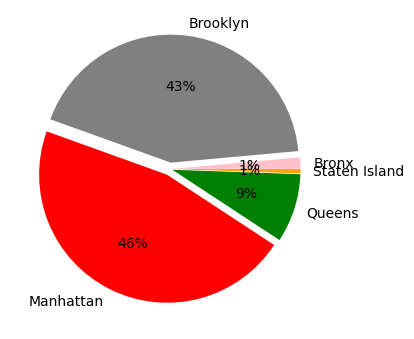

In [31]:
# Represent name of neighbourhood and count in a pie chart

neighbourhood_group_name = df_airbnb_bookings.groupby('neighbourhood_group')['name'].count()

neighbourhood_visualisation = neighbourhood_group_name.rename_axis('name_of_neighbourhood').reset_index(name = 'neighbourhood_count')
lable_name = neighbourhood_visualisation.name_of_neighbourhood
lable_value = neighbourhood_visualisation.neighbourhood_count
# # Defining colors for pie chart
colors = ['pink', 'grey', 'red','green', 'orange']
  
# # Define ratio of gap of each fragment in a tuple
explode = (0.02, 0.05, 0.05, 0.02, 0.02)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.5,2])

ax.pie(lable_value, labels = lable_name, autopct = '%1.0f%%', colors = colors, explode=explode)
plt.show()

##### 1. Why did you pick the specific chart?

I picked Pie chart for this to show the occupied area in different locations of NY

##### 2. What is/are the insight(s) found from the chart?


We had a closer look on different parts of NY and found that the maximum number of neighbours are in Manhattan which is 44% followed by Brooklyn which is 41% and so on. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

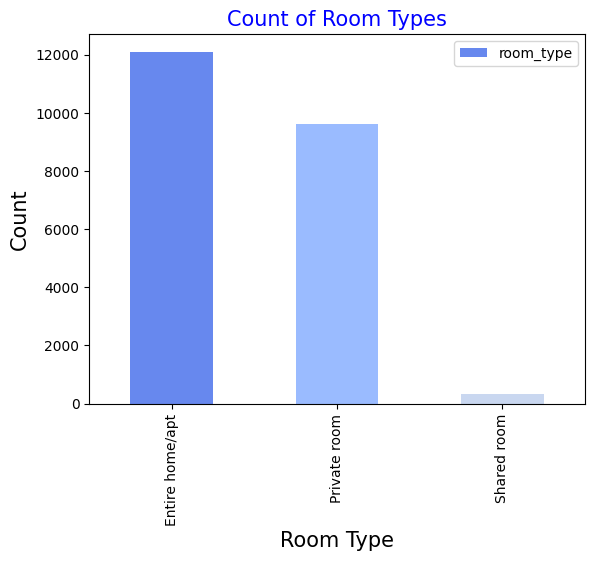

In [32]:
#  Bar graph of type of room and their number of rooms

# Create a bar graph
colours = sns.color_palette("coolwarm")


count_room_type.plot(kind='bar', y='room_type',color = colours, legend=True)
plt.xlabel('Room Type', size = 15)
plt.ylabel('Count', size = 15)

# Add a title
plt.title('Count of Room Types', color = 'blue', size = 15)

# Display the graph
plt.show()

##### 1. Why did you pick the specific chart?

I've used here the Bar Chart to show particular type of rooms occupied by the guests. By this chart we can easily compare the bookings among different room types.

##### 2. What is/are the insight(s) found from the chart?

Highest number of room occupied by Entire room/apt followed by private room and shared  room

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights aid us in determining the most popular room types among guests, allowing us to increase revenue by adding rooms of a similar category.


#### Chart - 3

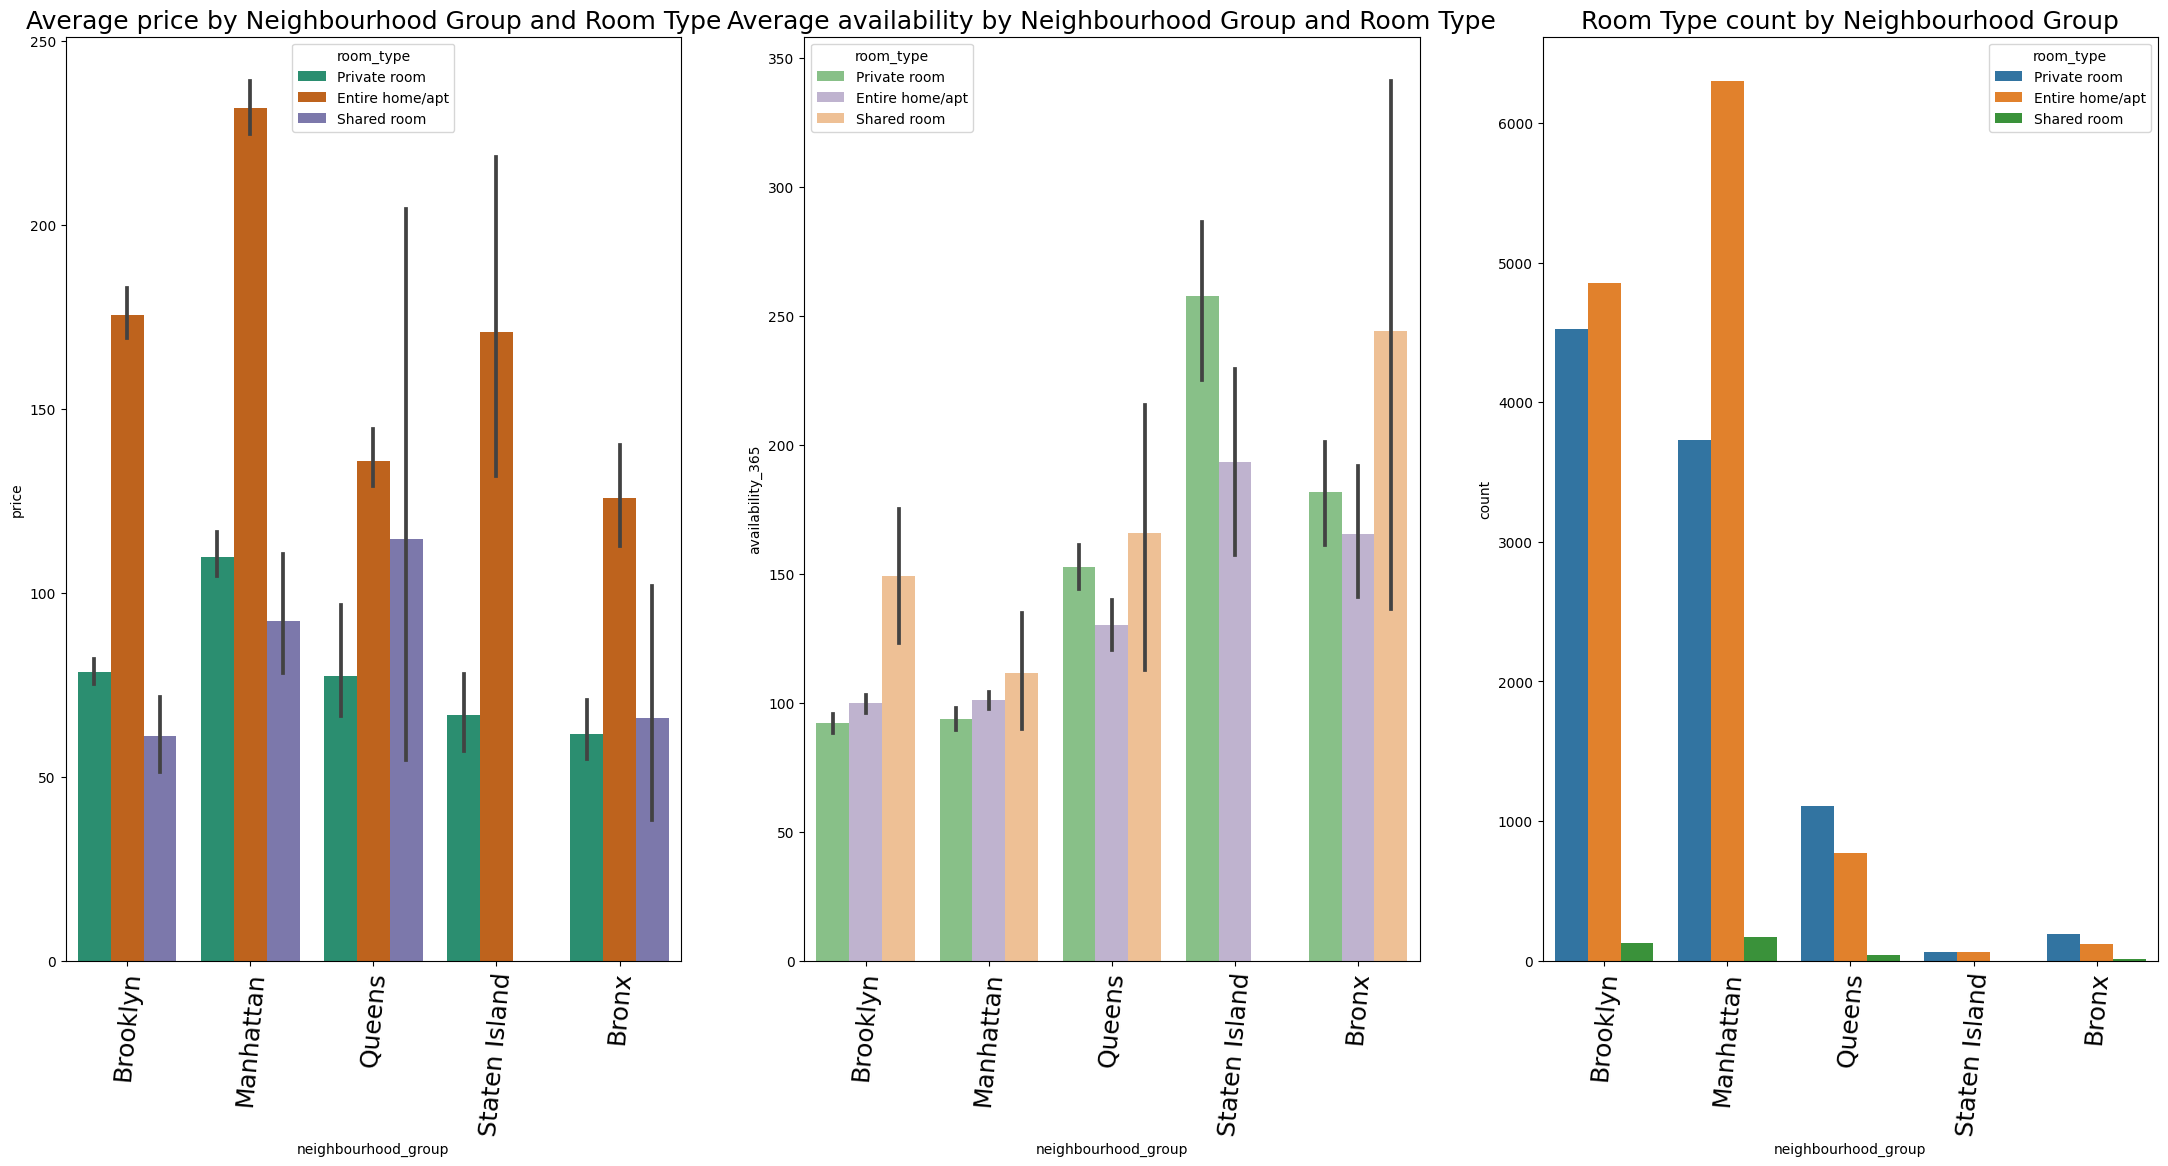

In [33]:

#  Subplots to visualize the relationship between neighbourhood_groups and room_type with at different aspects that are given below:


# 1) Average prices by neighbourhood groups
# 2)  Average availability by room types 
# 3) count of all room types in each neihbourhood groups 

fig, axs = plt.subplots(1, 3, figsize=(27, 12))


# Subplot 1: Average price by Neighbourhood Group and Room Type
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=df_airbnb_bookings, ax=axs[0], palette='Dark2')
axs[0].set_title('Average price by Neighbourhood Group and Room Type',fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=85, fontsize=18)


# Subplot 2: Average availability by Neighbourhood Group and Room Type

sns.barplot(x='neighbourhood_group', y='availability_365', hue='room_type', data= df_airbnb_bookings, ax=axs[1], palette = 'Accent')
axs[1].set_title('Average availability by Neighbourhood Group and Room Type',fontsize = 18)
axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=85, fontsize=18)


# Subplot 3: Room Type count by Neighbourhood Group
sns.countplot(x='neighbourhood_group', hue='room_type', data= df_airbnb_bookings, ax=axs[2])
axs[2].set_title('Room Type count by Neighbourhood Group',fontsize = 18)
axs[2].set_xticklabels(axs[0].get_xticklabels(), rotation=85, fontsize=18)


# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The use of subplots allowed us to investigate and understand the relationships between the type of room and the neighborhood group with multiple factors. Specifically, we were able to examine the following:

1. Room type count by neighborhood group: This plot enabled us to compare the frequency of each room type within different neighborhood groups.

2. Average availability by room type and neighborhood group: By plotting the average availability of each room type for each neighborhood group, we were able to assess whether certain types of rooms were more or less available in certain neighborhoods.

3. Average price by room types and neighborhood groups: This plot allowed us to examine the average price of each room type within each neighborhood group and identify any patterns or trends.

##### 2. What is/are the insight(s) found from the chart?


Here we come to know that Manhattan is currently hosting the maximum of listings. While Staten islands and Bronx are hosting the lowest number of listing among the neighbourhood groups.

Staten islands has the highest average availability rate. 

The price of Airbnb bookings in Manhattan is higher compared to the other neighborhood groups. This indicates that bookings in Manhattan may be more expensive overall. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely! The insights gained from the analysis can be valuable for businesses or individuals who are interested in understanding the pricing and availability of Airbnb bookings across different neighborhood groups. By taking into account the factors highlighted in the insights, such as room type and location, businesses or individuals can make informed decisions about where and when to book their accommodations. 

#### Chart - 4

In [34]:
# Print top 8 host name and reviews per month

top_8_hosts = df_airbnb_bookings.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(8)
top_8_hosts = top_8_hosts.reset_index()
top_8_hosts

,host_name,neighbourhood_group,reviews_per_month
0,Danielle,Queens,14.676667
1,Dona,Queens,13.990000
2,Malini,Queens,13.150000
3,Miss Dy,Queens,12.840000
4,Reshma,Manhattan,10.000000
5,Claudette,Queens,9.830000
6,J. E,Brooklyn,9.670000
7,Vikas,Brooklyn,9.610000


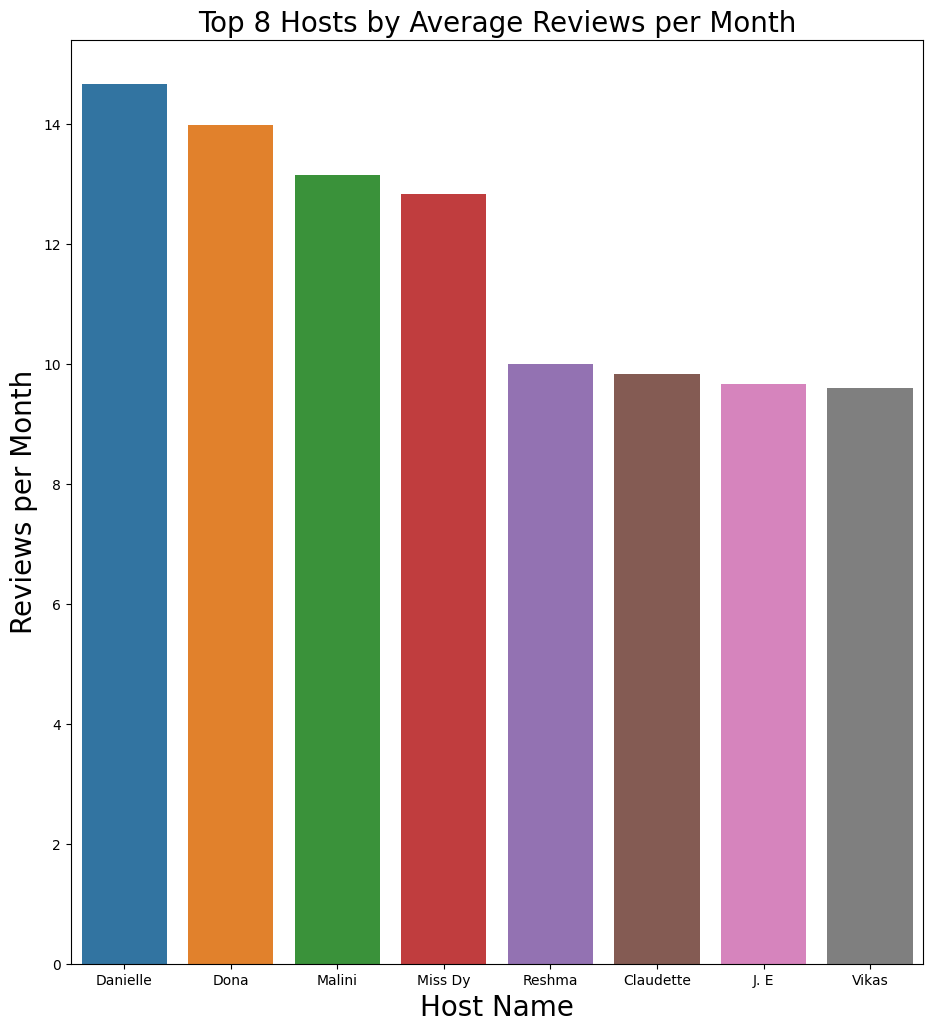

In [35]:

# Create a horizontal bar graph for top 8 host name and reviews per month

# Add labels and title

plt.figure(figsize = (11,12))

sns.barplot(x ='host_name',y = 'reviews_per_month', data = top_8_hosts)
plt.ylabel('Reviews per Month', size = 20)
plt.xlabel('Host Name', size = 20)
plt.title('Top 8 Hosts by Average Reviews per Month', size = 20)

# Display the graph
plt.show()


##### 1. Why did you pick the specific chart?

I used this chat to show the top hosts representing various evaluations each month, and this is the best chart to represent this kind of data.


##### 2. What is/are the insight(s) found from the chart?

By this chart we came to know that **'Row NYC'** have the maximum number of reviews per month and the least was from **'Deloris'**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By visually displaying this data, the chart has provided an easy and effective way to identify the hosts who have had the most impact on the Airbnb community.

#### Chart - 5

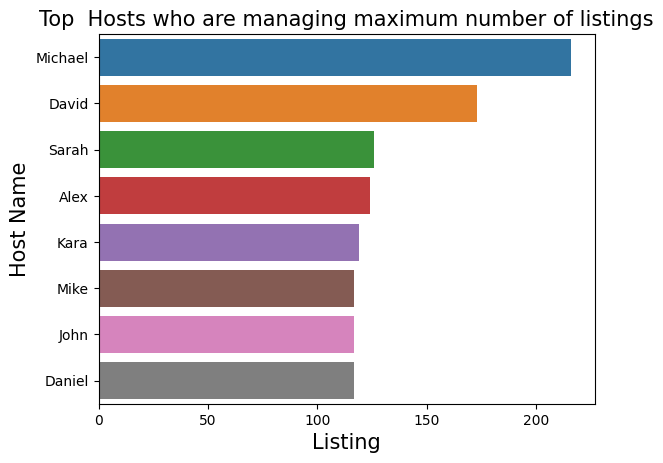

In [36]:
# Create a horizontal bar graph using seaborn for top 8 hosts name and review per month

# Print top 8 host name and reviews per month

top_hosts = df_airbnb_bookings.groupby(['host_name'])['name'].count().sort_values(ascending = False).head(8)
top_hosts = top_hosts.reset_index()
top_hosts

sns.barplot(x="name", y="host_name", data=top_hosts.reset_index())

# Add labels and title
plt.xlabel('Listing', size =15)
plt.ylabel('Host Name', size =15)
plt.title('Top  Hosts who are managing maximum number of listings', size =15)

# Display the graph
plt.show()


##### 1. Why did you pick the specific chart?

By utilizing this particular chart, we were able to visually represent the hosts who have the highest number of listings on Airbnb. The chart allowed us to easily see and compare the number of listings each host has, providing a clear and concise visualization of this information.

##### 2. What is/are the insight(s) found from the chart?

Here, we came to a resolution that the maximum number of listings are owned by Michael followed by David and Sonder. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart has facilitated the identification of the most successful Airbnb hosts, who have made a significant contribution to the platform by having the largest number of listings. By visually displaying this data, the chart has provided an easy and effective way to identify the hosts who have had the most impact on the Airbnb community.

#### Chart - 6


In [37]:
# Visualise the data in stacked bar -- Print the groups of name and the sum of their reviews in decending order. 

# Create a line plot of the top 15 names with the highest sum of reviews per month

# Assigning the value to name_group_and_review variable

name_group_and_reviews = df_airbnb_bookings.groupby(['name']).agg({'reviews_per_month':'sum'}).sort_values(by = 'reviews_per_month',ascending = False).head(15)

name_group_and_reviews

,reviews_per_month
name,
Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22
Room near JFK Queen Bed,14.58
Sun Room Family Home LGA Airport NO CLEANING FEE,14.36
Private bedroom 8 mins-JFK&The Mall,13.48
Comfy Room Family Home LGA Airport NO CLEANING FEE,13.45
Room Near JFK Twin Beds,13.40
Cozy Room Close to JFK!!,13.15
THE PRIVACY DEN ~ 5 MINUTES TO JFK,12.84
"5 minutes from JFK,one single cozy bedroom for one",11.91


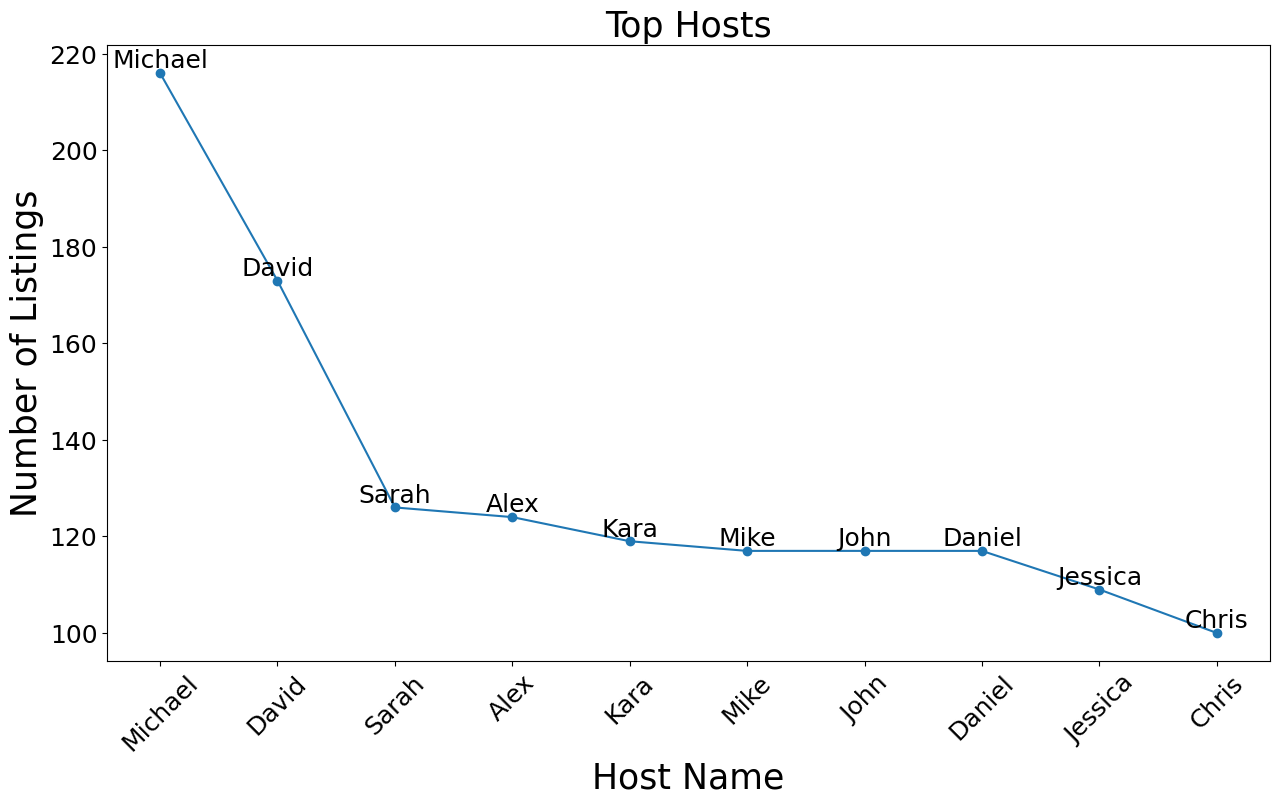

In [38]:

# Print top host and their respective listings

plt.figure(figsize = (15,8))
plt.plot(top_host_listings.index, top_host_listings.values, marker='o')

# Set the title and axis labels
plt.title('Top Hosts', fontsize=25)
plt.xlabel('Host Name', fontsize=25)
plt.ylabel('Number of Listings', fontsize=25)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)

# Add labels to the markers
for i, label in enumerate(top_host_listings.index):
    plt.text(top_host_listings.index[i], top_host_listings.values[i], label,
             fontsize=18, ha='center', va='bottom')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart has been utilized to present the reviews for specific listings in a descending order. By using this chart, we were able to clearly display the review ratings for each listing, from highest to lowest.

##### 2. What is/are the insight(s) found from the chart?

Using this chart we've compared the review ratings of different listings and gain insights into the quality of each property. Additionally, we came to a conclusion that 'Enjoy great views of the city in our deluxe rooms' have maximum number of reviews. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Definately using this insight it will create a positive way impact as we can easlity differenciate the review stats. 

#### Chart - 7


In [39]:
# Group the data by the "group" column and count the number of unique room types in each group

group_counts = df_airbnb_bookings.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()

# Print the result

group_counts

neighbourhood_group  room_type      
Bronx                Entire home/apt     119
                     Private room        192
                     Shared room           8
Brooklyn             Entire home/apt    4850
                     Private room       4523
                     Shared room         124
Manhattan            Entire home/apt    6303
                     Private room       3728
                     Shared room         172
Queens               Entire home/apt     771
                     Private room       1105
                     Shared room          42
Staten Island        Entire home/apt      59
                     Private room         62
Name: room_type, dtype: int64

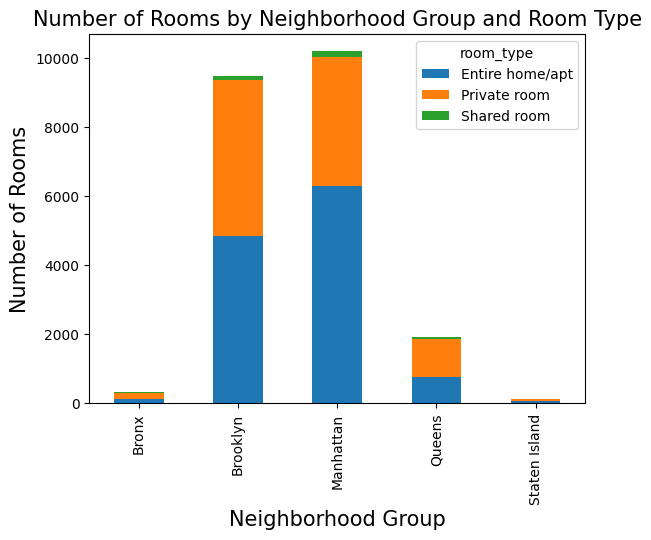

In [40]:
# Reshape the data to create a stacked bar graph
stacked_data = group_counts.unstack()

# Plot the stacked bar graph
stacked_data.plot(kind='bar', stacked=True)

# Add labels and titles
plt.xlabel('Neighborhood Group', size =15)
plt.ylabel('Number of Rooms', size =15)
plt.title('Number of Rooms by Neighborhood Group and Room Type', size =15)

# Print graph
plt.show()

##### 1. Why did you pick the specific chart?

This chart was used to visualize the distribution of room types across different neighborhood groups on Airbnb. By using this chart, we were able to clearly see the number of room types available in each neighborhood group, providing valuable insights into the diversity and availability of accommodations in each area. This information can be particularly useful for travelers who are looking for specific types of accommodations in particular neighborhoods.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that Manhattan has the highest number of available room types, which can be useful information for individuals seeking diverse accommodation options in this area.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the insights gained from this chart, we can identify the neighborhood groups that have the lowest number of available rooms and explore ways to increase the number of accommodations in those areas. 

#### Chart - 8


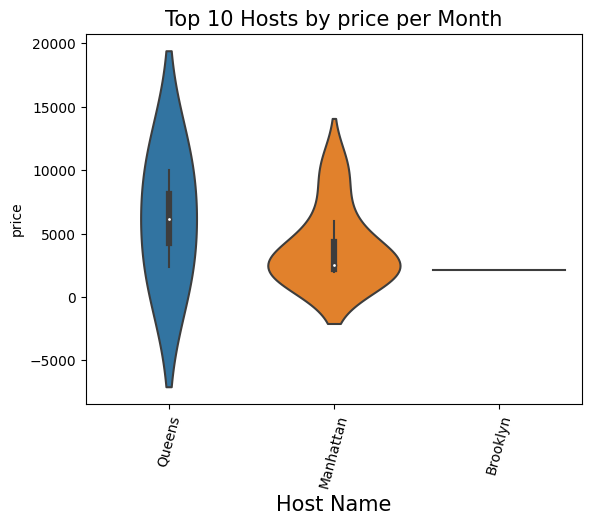

In [41]:
# Print top 10 host name and reviews per month and visualise on a graph 

top_10_hosts = df_airbnb_bookings.groupby(['host_name','neighbourhood_group'])['price'].mean().sort_values(ascending = False).head(10)
top_10_hosts = top_10_hosts.reset_index()

ax= sns.violinplot(x='neighbourhood_group',y='price',data=top_10_hosts)

plt.xticks(rotation=75)
plt.title('Top 10 Hosts by price per Month', size = 15)
plt.xlabel('Host Name', size = 15)
# plt.ylabel('price', size = 15)
plt.show()

##### 1. Why did you pick the specific chart?

I've used violen chat to represent host name and the price because by this chart we can surely conclude that price fluctuations over time

##### 2. What is/are the insight(s) found from the chart?

By utilizing this chart, we were able to gain insights into the variations of prices for different hosts over time. The chart clearly displays the distribution of prices for each host, providing a visual representation of how the prices fluctuate over time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be particularly useful for identifying trends in pricing and understanding the factors that influence price changes, such as seasonal demand or changes in price.

#### Chart - 9


Text(0.5, 1.0, 'Location Coordinates')

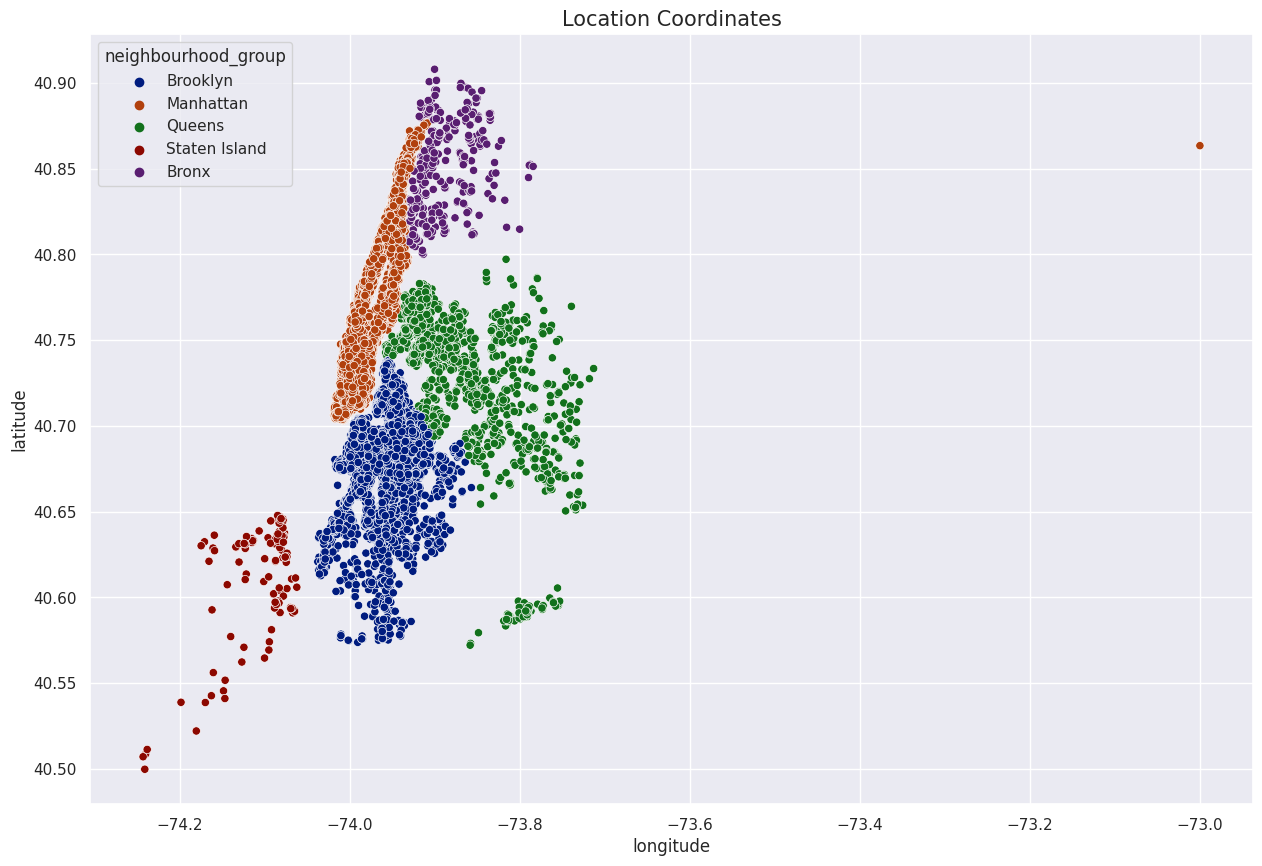

In [42]:
#Find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (15, 10)})
ax= sns.scatterplot(data=df_airbnb_bookings, x="longitude", y="latitude",hue='neighbourhood_group',palette='dark')
ax.set_title('Location Coordinates', size = 15)

##### 1. Why did you pick the specific chart?

I've used scatter chart to represent latitude and longitude of all the neighbourhood groups. By using this chart we can easily determine the va

##### 2. What is/are the insight(s) found from the chart?

Based on the analysis of the latitude and longitude data, we can conclude that Queens has the highest number of coordinates followed by Brooklyn. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be useful for guests who are looking to stay in these areas, as well as for hosts who are looking to invest in Airbnb rentals in these popular neighborhoods.

#### Chart - 10 - Correlation Heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'id'),
  Text(1.5, 0, 'host_id'),
  Text(2.5, 0, 'latitude'),
  Text(3.5, 0, 'longitude'),
  Text(4.5, 0, 'price'),
  Text(5.5, 0, 'minimum_nights'),
  Text(6.5, 0, 'number_of_reviews'),
  Text(7.5, 0, 'reviews_per_month'),
  Text(8.5, 0, 'calculated_host_listings_count'),
  Text(9.5, 0, 'availability_365')])

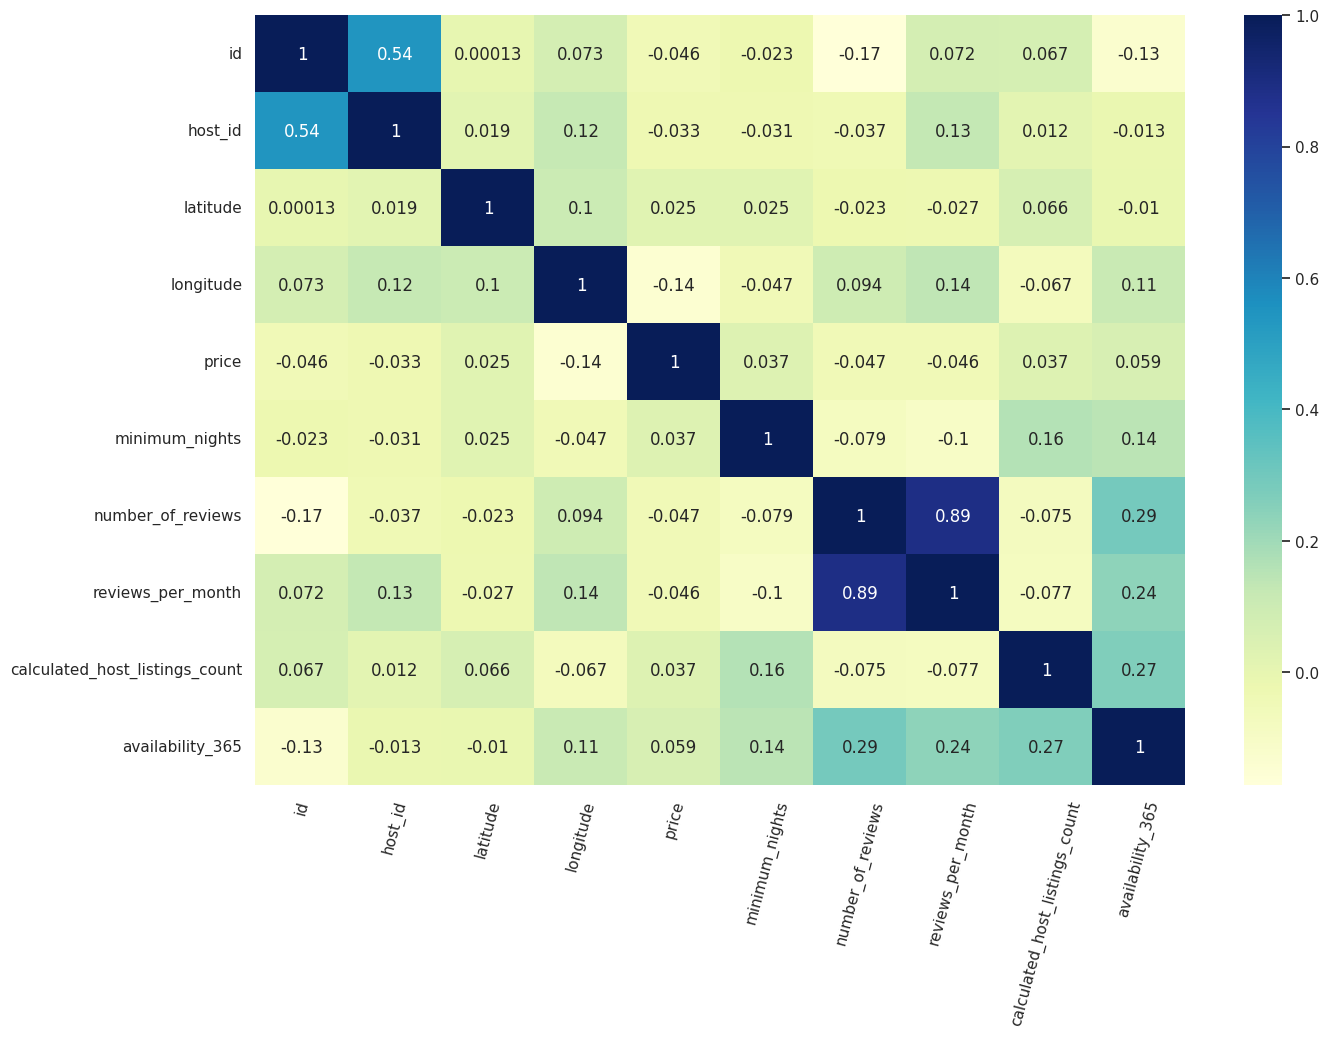

In [43]:
#Print Correlation Heatmap

corr_matrix = df_airbnb_bookings.corr()
sns.heatmap(corr_matrix, cmap = 'YlGnBu', annot = True)
plt.xticks(rotation= 75)

##### 1. Why did you pick the specific chart?

I have used the correlation heatmap for this because it will show the relation or the pattern that the 

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 11 - Pair Plot 

In [44]:
# CODE

In [ ]:
df_airbnb_bookings_sample = df_airbnb_bookings.sample(1000)

# Set the color palette to be used in the plot
colors = sns.color_palette("Set2")

# Create the Pair Plot using Seaborn
pairplot = sns.pairplot(df_airbnb_bookings_sample, palette=colors)

# Display the Pair Plot
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is a powerful data visualization tool that allows us to explore the relationships between different variables in a dataset.It enables us to identify patterns, correlations, and outliers in high-dimensional datasets. This makes it easier to understand the structure and relationships within the data, which can help us gain insights and make informed decisions. Overall, a pairplot is an essential tool for data analysis and visualization.

##### 2. What is/are the insight(s) found from the chart?

The pairplot is a useful tool for visualizing the pairwise relationships between variables in a high-dimensional dataset like AirBnB. By analyzing the patterns, correlations, and outliers revealed in the plot, we can gain insights into the underlying structure and relationships within the data. This enables us to identify potential areas of interest or concern that may require further investigation or action. Overall, the pairplot provides a comprehensive and intuitive way to explore complex datasets and uncover meaningful insights.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Based on the analysis of the dataset, there are several factors that I would suggest to the client to achieve their business objectives:

* Firstly, there is a significant opportunity for growth, as several neighborhood groups such as Staten Island, Queens, and Bronx have a lower number of listings compared to the top two groups, Manhattan and Brooklyn, which account for over 85% of the total listings. The remaining neighborhood groups can increase their share to create healthy competition among the top two.

* Secondly, the client should focus on increasing the count of shared rooms as the average bookings for shared rooms are higher than the other two room types. This can increase the revenue generated from these listings.

* Thirdly, the client should encourage hosts to manage more listings as several hosts are running multiple listings and earning significant amounts of money. This can increase the overall revenue for the client.

* Fourthly, the higher prices of listings with higher reviews per month indicate that guests are satisfied with the services provided. Hence, the hosts should focus on providing better services to enhance the guests' experience and attract more bookings.

* Lastly, the availability rate of several listings is very low, which is a missed opportunity for hosts to generate more revenue. The client should encourage these hosts to increase their availability rate by offering incentives, which can ultimately increase their revenue.


Overall, by considering these factors, the client can maximize their revenue and achieve their business objectives.

# **Conclusion**

In conclusion, we found that: 


1. Based on our analysis, we have found that guests who prefer to stay in private rooms tend to have shorter stays compared to those who prefer to stay in a home or apartment.

2. This information can be useful for property owners who are looking to optimize the occupancy rates of their rental properties and attract guests who are likely to stay for longer durations. 

3. Those who choose to dwell in an entire home or apartment will spend more time in that specific neighbourhood.

4. Our analysis also suggests that a majority of guests prefer to pay lower prices for accommodations.

5.  By examining a variety of factors, property owners can better understand the unique preferences and behaviors of their target audience and tailor their offerings accordingly to attract and retain these guests.

6. While a higher number of reviews for a particular neighborhood group can indicate that it is a popular destination for tourists, it is not necessarily a definitive indicator of a tourist place. 

7. There is evidence to suggest that individuals who spend only one night in a particular location may be considered travelers.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***